In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('shopping_data.csv')

In [4]:

data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
#select annual income and spending score
X= data.iloc[:,-2:].values

In [17]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

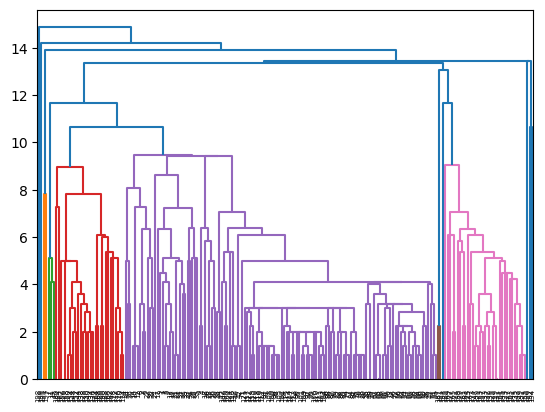

In [28]:
import scipy.cluster.hierarchy as sch
dend1 = sch.dendrogram(sch.linkage(X, method='single'))

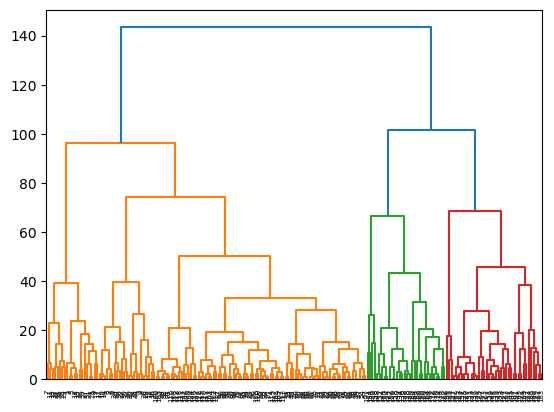

In [29]:
dend1 = sch.dendrogram(sch.linkage(X, method='complete'))

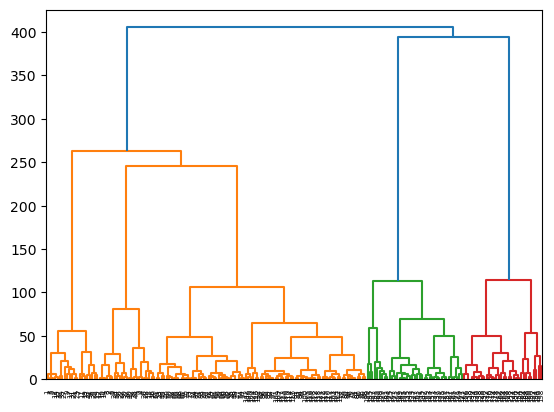

In [30]:
dend1 = sch.dendrogram(sch.linkage(X, method='ward'))

In [34]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5)
cluster_number = cluster.fit_predict(X) # fit_predict never perform with unsupervised learning
cluster_number

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [35]:
data['Custmer_segment'] = cluster_number 

In [36]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Custmer_segment
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [40]:
data.Custmer_segment.value_counts()

Custmer_segment
1    85
2    39
0    32
4    23
3    21
Name: count, dtype: int64

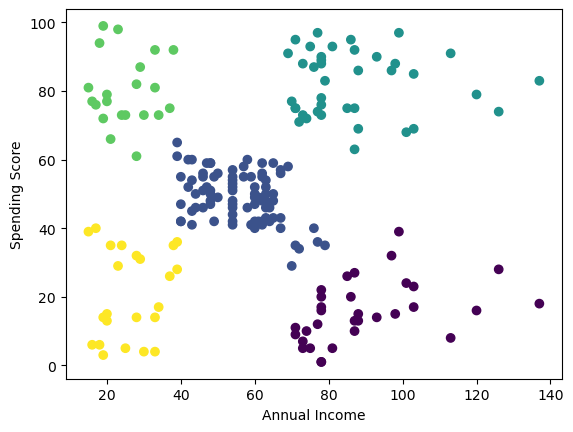

In [47]:
plt.scatter(X[:,0], X[:,1], c= cluster.labels_)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [48]:
#silhouette score-
#measure the quality of cluster in clustring alorithm(-1, 1)
from sklearn.metrics import silhouette_score
silhouette_score(X, cluster_number)


0.5529945955148897

In [50]:
#Finding cluster numbers and compare with each other using graph
cluster2 = AgglomerativeClustering(n_clusters=2)
cluster_number2 = cluster2.fit_predict(X)
cluster3 = AgglomerativeClustering(n_clusters=3)
cluster_number3 = cluster3.fit_predict(X)
cluster4 = AgglomerativeClustering(n_clusters=4)
cluster_number4 = cluster4.fit_predict(X)

Text(0, 0.5, 'score')

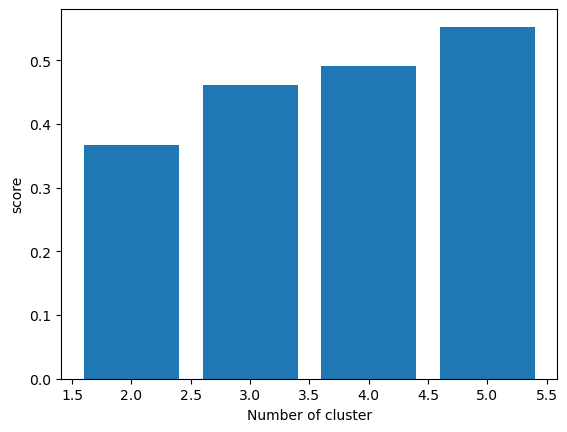

In [52]:
sil_score=[]
sil_score.append(silhouette_score(X, cluster_number2))
sil_score.append(silhouette_score(X, cluster_number3))
sil_score.append(silhouette_score(X, cluster_number4))
sil_score.append(silhouette_score(X, cluster_number))

k = [2,3,4,5]
plt.bar(k,sil_score)
plt.xlabel('Number of cluster')
plt.ylabel('score')